IQR method to remove Outlier
 IQR means Interquartile range
 IQR = Q3-Q1

 Its calculated from the box plate
 its the difference between the Q1(first quantile) and Q3(3rd qunatile)
 qunatile is nothing but, 

 if we divide the range into multiple small pieces then its quntile. The first quantile q1 is 25 percentiles(if we remove 25% of the data we get 25 percentile) of the data, q3 is 75 percentiles(if we remove 75% of the data we get 75 percentile) of the data

The box plot has viscor plots that is the left and right ends of the box plot. the minimum value is Q1-1.5*IQR and max value is Q3+1.5*IQR

all the data below the min value and above the max value is outlier data



In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
dataset = pd.read_csv("../Data/loan_data.csv")
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [8]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


plt.figure is used to maximize or minimize the figure

[]

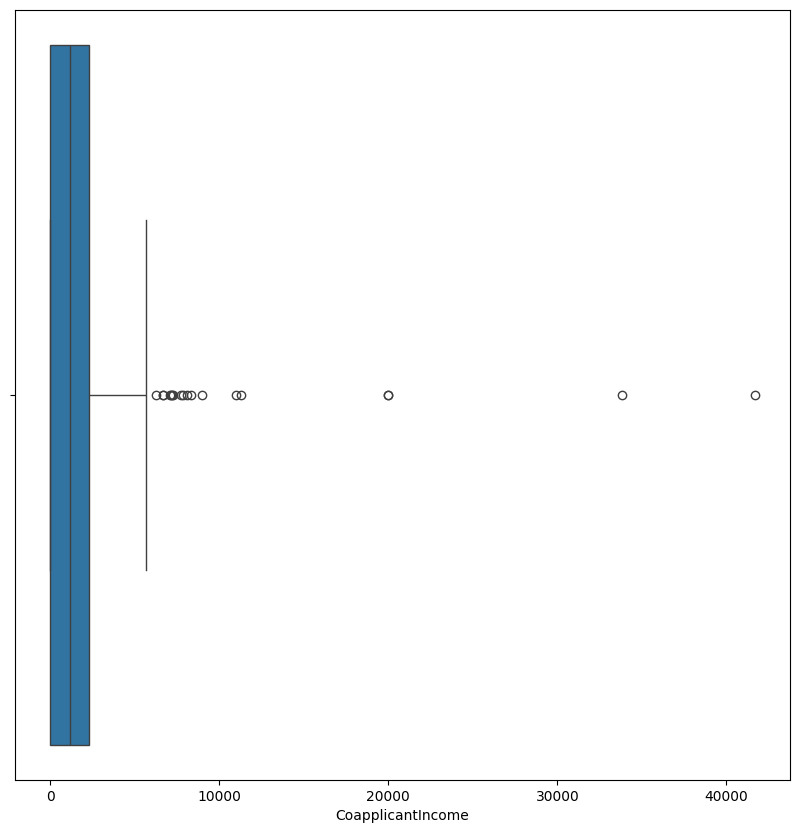

In [24]:
plt.figure(figsize=(10,10))
sns.boxplot(x="CoapplicantIncome",data=dataset)
plt.plot()

In [10]:
dataset.shape

(614, 13)

In [13]:
q1 = dataset["CoapplicantIncome"].quantile(0.25)
q3 = dataset["CoapplicantIncome"].quantile(0.75)
q3

np.float64(2297.25)

In [14]:
IQR = q3-q1

In [16]:
min_range = q1-1.5*IQR
max_range = q3+1.5*IQR
min_range,max_range

(np.float64(-3445.875), np.float64(5743.125))

In [ ]:
new_dataset = dataset[dataset["CoapplicantIncome"]<=max_range]

In [28]:
new_dataset.shape

(596, 13)

[]

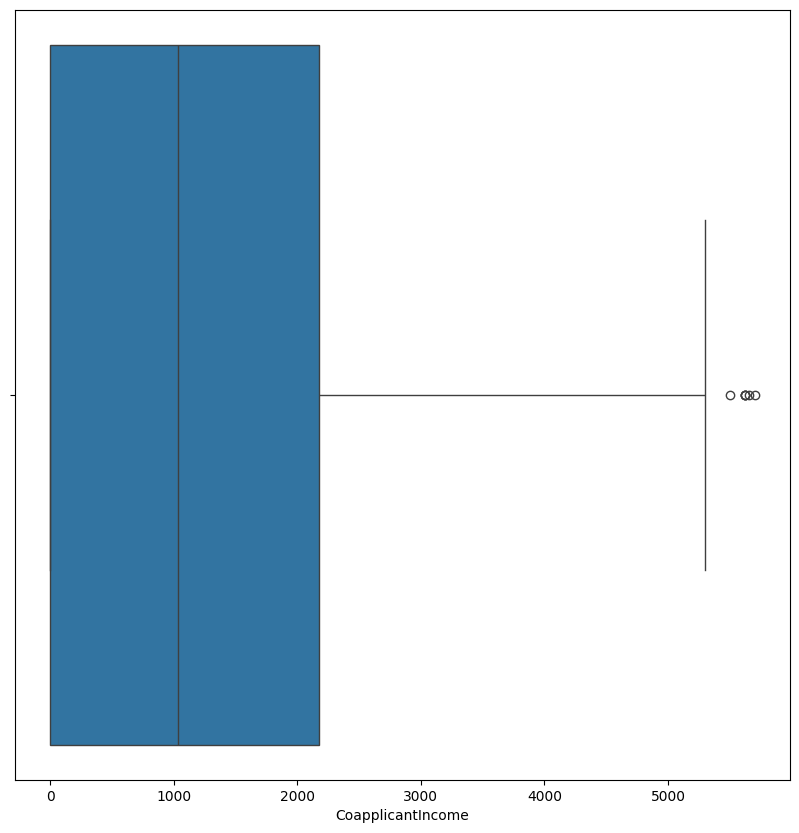

In [29]:
plt.figure(figsize=(10,10))
sns.boxplot(x="CoapplicantIncome",data=new_dataset)
plt.plot()

some outlier can present and if we aggressively try to remove all the outliers then there is a possibility that we may loos too much data
Alogirthms like linear regression require removal of outlier where as algorithms like decision tree not require the removal of outlier data

Now we will see how we can remove the Outliers using the Z score 

the middile data is nothing but the mu or the mean data, and to the left and right we have the data that has standard deviation like mu+sd and mu-sd which is first standard deviation and similarly we have mu+2sd and mu-2sd and then we have the third sd as mu-3sd and mu+3sd

the 1st sd has 68.26% of data
the 2nd sd has 95.44% of data
the 3rd sd has 99.72% of data
all the data after 3rd sd is considered as outlier

And to remove the outlier data from the curve we use Z score algorithm

z= (x-mu)/sd

this will create another column Zneu for all the values

by which we decide the range of the Z like +/- 3 value.

min = mu-3sd and max = mu+3sd
this is nothing but what we get in the zscore as well

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
dataset = pd.read_csv("../Data/loan_data.csv")

In [33]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [35]:
dataset.isnull().sum()

Loan_ID               0
Gender               14
Married               4
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: xlabel='CoapplicantIncome'>

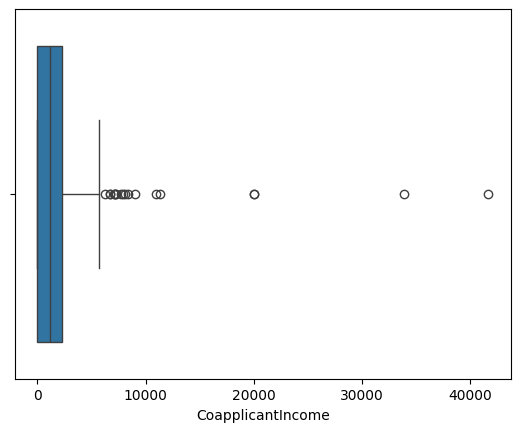

In [ ]:
sns.boxplot(x="CoapplicantIncome",data=dataset)

/tmp/ipykernel_17017/3682481418.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

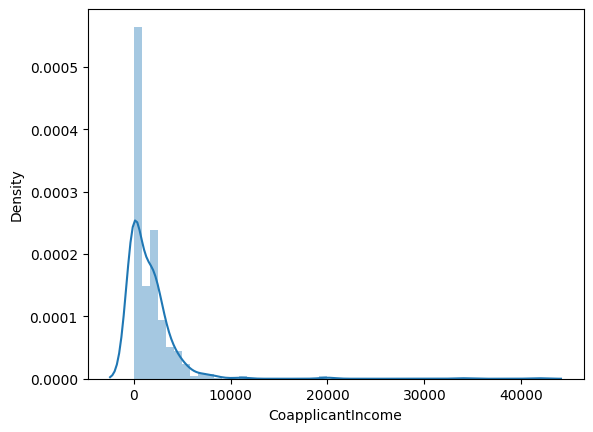

In [41]:
sns.distplot(dataset["CoapplicantIncome"])


we will be using direct method for removal first

In [42]:
min_range = dataset["CoapplicantIncome"].mean()-3*dataset["CoapplicantIncome"].std()
max_range = dataset["CoapplicantIncome"].mean()+3*dataset["CoapplicantIncome"].std()

In [43]:
new_dataset = dataset[dataset["CoapplicantIncome"]<max_range]
new_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,NaN,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [44]:
new_dataset.shape

(608, 13)

<Axes: xlabel='CoapplicantIncome'>

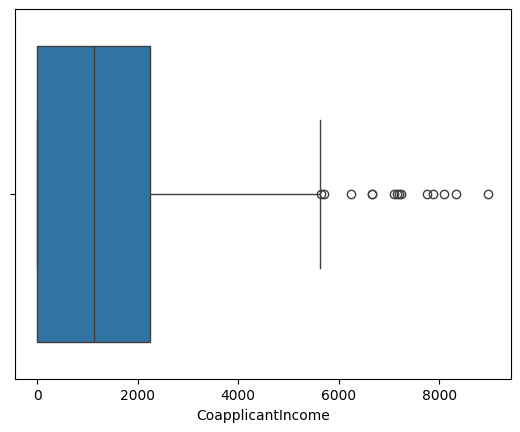

In [45]:
sns.boxplot(x="CoapplicantIncome",data=new_dataset)

Now we would see Z score

In [47]:
z_score = (dataset["CoapplicantIncome"]-dataset["CoapplicantIncome"].mean())/dataset["CoapplicantIncome"].std()
z_score

0     -0.554036
1     -0.038700
2     -0.554036
3      0.251774
4     -0.554036
         ...   
609   -0.554036
610   -0.554036
611   -0.472019
612   -0.554036
613   -0.554036
Name: CoapplicantIncome, Length: 614, dtype: float64

In [49]:
dataset["z_score"]=z_score

In [50]:
dataset[dataset["z_score"]<3]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,-0.554036
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.038700
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.554036
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.251774
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,-0.554036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.554036
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.554036
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,-0.472019
612,LP002984,Male,NaN,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,-0.554036
